In [ ]:
!pip install pyswarm

  Created wheel for pyswarm: filename=pyswarm-0.6-cp36-none-any.whl size=4481 sha256=bf0f9c22c553b1effcec4b696cd11909c093d6ce71b5e73c05fec27468c10ac1
  Stored in directory: /root/.cache/pip/wheels/37/c5/f6/b33b9ac00040cb95c1f00af982a4197334a672d6de43f4699f
Successfully built pyswarm


In [ ]:
#from pyswarm import pso
import numpy as np
import matplotlib as plt
import math as mt
import sys

In [ ]:
dados1 = [3456, 1584, 236, 516, 1820, 452, 432, 1264, 3072, 384, 2448, 32, 360, 998, 656, 180, 244, 1528, 44, 3064, 324, 1528, 348, 336]
dados2 = [99, 38, 109, 10, 35, 42, 31, 18, 53, 3, 12, 13, 40, 6, 78, 77, 272, 24, 66, 25, 4, 8, 26, 98, 11, 87, 11, 54, 22, 13, 54, 22, 13, 54, 22, 13, 54, 19, 47, 14, 53, 14, 35, 73, 18, 38, 140, 19, 10, 17, 4, 54, 26, 135, 44, 59, 11, 18, 3, 46, 17, 7, 75, 58, 102, 6, 53, 47, 26, 87, 6, 13]
dados3 = [860, 1608, 1134, 2703, 645, 95, 1278, 605, 344, 1054, 680, 405, 367, 2758, 355, 1084, 855, 280, 490, 945, 105, 127, 61, 326, 300]

In [ ]:
dadost=dados1
somatotal = 0
def logver (par):
  n=len(dadost)

  for i in range(1,n):
    global somatotal
    somaa = 0
    itema = 0
    itemb = 0
    somab = 0
    itemc = 0
    somac = 0
    itemb = dadost[i] 
    itemc = dadost[i]
  
    for j in range (0,i-1):
      somaa = somaa + dadost[j]
      somab = somab + dadost[j] 
      somac = somac + dadost[j] 
    itema = (((somaa*par[2])/par[0])**par[1])
    itemb = (((itemb + (par[2]*somab))/par[0])**par[1])
    itemc = (par[1]-1)*mt.log(itemc + (par[2]*somac))
    somatotal = somatotal + (itema - itemb + itemc)      

  veros1 = ((par[1]-1)*mt.log(dadost[0])) + (n*(mt.log(par[1])-(par[1]*mt.log(par[0])))) 
  veros2 = - ((dadost[0]/par[0])**par[1]) + somatotal
  veros = veros1 + veros2
  return -veros 

In [ ]:
lb = [1e-2,1e-2,0] 
ub = [10000,10,1]
abq,valor = pso(logver,lb,ub, maxiter=10000,swarmsize=25, phip=0.35, phig=0.75)

print(abq)
print(valor)

Stopping search: maximum iterations reached --> 10000
[1.17439828e+03 4.69760286e+00 1.10614931e-01]
1.3576622545856732e+58


In [ ]:
#função log-verossimilhança para dados terminados em tempo, dados3
n = len(dados3)
def ln_ltt(alfa, beta, q):

  soma1 = 0
  for i in range(1, n): #como python começa do 0, o index 1 será o 2 e o 0 o 1
    soma_int = 0
    for j in range(0, i): #era para ter um i-1 porém o range do python só vai até o penúltimo número, então acaba dando no mesmo
      soma_int += dados3[j]
    soma1 += mt.log(dados3[i] + q*soma_int)

  soma2 = 0
  for k in range(0, n):
    soma2 += dados3[k]

  soma3 = 0
  for z in range(1, n):
    soma_int = 0
    for t in range(0, i):
      soma_int += dados3[t]
    soma3 += ((((q*soma_int)/alfa)**beta) - (((dados3[z] + q*soma_int)/alfa)**beta))

  x_est = abs(dados3[-1] - dados3[-2])

  ln_verossimilhança_ltt = (beta - 1)*(mt.log(dados3[0]) + soma1) + n*(mt.log(beta) - beta*mt.log(alfa)) - (((x_est + q*soma2)/alfa)**beta) + (((q*soma2)**beta - dados3[0]**beta)/alfa**beta) + soma3

  return -ln_verossimilhança_ltt

In [ ]:
#função log-verossimilhança para dados terminados em tempo, dados3
n = len(dados3)
#parametros[alfa,beta,q]
def ln_ltt(parametros):

  soma1 = 0
  for i in range(1, n): #como python começa do 0, o index 1 será o 2 e o 0 o 1
    soma_int = 0
    for j in range(0, i): #era para ter um i-1 porém o range do python só vai até o penúltimo número, então acaba dando no mesmo
      soma_int += dados3[j]
    soma1 += mt.log(dados3[i] + parametros[2]*soma_int)

  soma2 = 0
  for k in range(0, n):
    soma2 += dados3[k]

  soma3 = 0
  for z in range(1, n):
    soma_int = 0
    for t in range(0, i):
      soma_int += dados3[t]
    soma3 += ((((parametros[2]*soma_int)/parametros[0])**parametros[1]) - (((dados3[z] + parametros[2]*soma_int)/parametros[0])**parametros[1]))

  x_est = abs(dados3[-1] - dados3[-2])

  ln_verossimilhança_ltt = (parametros[1] - 1)*(mt.log(dados3[0]) + soma1) + n*(mt.log(parametros[1]) - parametros[1]*mt.log(parametros[0])) - (((x_est + parametros[2]*soma2)/parametros[0])**parametros[1]) + (((parametros[2]*soma2)**parametros[1] - dados3[0]**parametros[1])/parametros[0]**parametros[1]) + soma3

  return -ln_verossimilhança_ltt

In [ ]:
# Set-up hyperparameters
lb =[1e-4, 1e-4, 0]
ub = [1000, 50, 1]

# Call instance of PSO
par, optimizer2 = pso(ln_ltt, lb, ub,maxiter=10000,swarmsize=25, phip=0.75, phig=0.35)
print(par)
print(optimizer2)



In [ ]:
2.65047998e-01

0.265047998

Questão 8



In [ ]:
from random import random
import numpy as np

In [ ]:
def simulacao(dados, mc, alfa, beta, q):
  #entrada
  t = np.cumsum(dados)
  t = np.insert(t, 0, 0) #v[0] = 0
  n = len(t)
  nf = [0]*n
  mean_nf = [0]*n


#caso para primeira falha
  for j in range(0, mc):
    tac = t[0]
    flag = True
    while (tac < t[1]) and (flag == True):
      u = random()
      x = alfa*(-mt.log(1 - u))**(1/beta)
      if (tac + x <= t[1]):
        tac += x
        nf[1] = nf[1] + 1
      else:
        flag = False
    mean_nf[1] = nf[1]/mc
    
#caso da n-ésima falha
  for i in range(2, n):
    for j in range(0, mc):
      tac = t[i-1]
      flag = True
      while (tac < t[i]) and (flag == True):
        u = random()
        x = (alfa*((((q*t[i-1])/alfa)**beta) - mt.log(1 - u))**(1/beta)) - q*t[i-1]
        print(x)
        #print('x, i!=0', x)
        if (tac + x <= t[i]):
          tac += x
          nf[i] = nf[i] + 1
        else:
          flag = False
    mean_nf[i] = nf[i]/mc
  
  mean_nf_ac = np.cumsum(mean_nf)


  return (mean_nf_ac)

In [ ]:
#simulação para ln(ltf) G1aG6
#dados = dados1
#alfa = 5.86027925e+02 
#beta = 4.60985883e+01 
#q = 4.30764267e-01
simulacao(dados2, 1000, 123.07321506, 8.41535506e-01, 1.24161478e-01)

A saída de streaming foi truncada nas últimas 5000 linhas.
542.3974480547745
455.19247512969815
79.26615720450309
233.15969705283118
171.0205581854869
734.7040922500314
386.6033606018106
207.60699921298584
410.62636185452885
83.72286391920676
30.904824512713617
192.90287427403524
34.32759076378983
163.95258927657
90.39637642909037
296.9441787949001
67.89307276896648
47.88366978454678
171.5407281969795
29.786184461731523
507.2410045053327
580.8729119765612
207.87160349380912
43.95184149312621
62.24310209971799
225.16676691922095
1.6290873551524214
232.47816256996265
27.6944693124031
100.96149441915264
190.2980248295019
65.81376114591569
66.26017848975914
171.549952726296
81.3638237491615
95.43421238497558
265.04049336403824
32.32454955330428
133.9902246805416
603.1735554635809
34.59536916198908
313.8595252686294
247.7316614730974
79.13584866242013
11.510065829319103
206.64734878046107
346.22951529975256
84.63628720238108
502.4117998569639
517.2779026556059
1.5854149530971995
48.93990372

array([ 0.   ,  0.899,  1.202,  2.074,  2.148,  2.438,  2.792,  3.034,
        3.17 ,  3.591,  3.613,  3.717,  3.787,  4.083,  4.132,  4.657,
        5.223,  7.039,  7.189,  7.635,  7.782,  7.817,  7.876,  8.03 ,
        8.68 ,  8.754,  9.345,  9.413,  9.776,  9.918, 10.001, 10.361,
       10.526, 10.613, 10.974, 11.121, 11.207, 11.557, 11.666, 11.952,
       12.051, 12.385, 12.487, 12.685, 13.135, 13.269, 13.499, 14.305,
       14.41 , 14.474, 14.566, 14.592, 14.901, 15.054, 15.837, 16.087,
       16.423, 16.488, 16.606, 16.633, 16.899, 16.997, 17.029, 17.438,
       17.783, 18.346, 18.373, 18.672, 18.931, 19.091, 19.559, 19.596,
       19.672])

In [ ]:
a = ''
type(a)

str

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_nf_ac = [0.   , 0.552, 0.608, 0.614, 0.631, 0.679, 0.686, 0.7  , 0.727,
       0.781, 0.785, 0.805, 0.805, 0.808, 0.822, 0.834, 0.836, 0.84 ,
       0.86 , 0.861, 0.896, 0.899, 0.921, 0.925, 0.929]

In [ ]:
#Gráfico

def graf_mae(dados, mean_nf_ac):
  #Gráfico
  dados = np.cumsum(dados)
  dados = np.insert(dados, 0, 0)
  n = len(dados)
  dados_1 = [0]*n
  dados_1[0]= 1
  for i in range(1, n):
    dados_1[i] = dados_1[i] + 1
  dados_1 = np.cumsum(dados_1)

  plt.figure(figsize=(12, 6))
  plt.plot(dados, mean_nf_ac, marker='o', label= "Simulado")
  plt.plot(dados, dados_1, marker='o', label = "Real")
  plt.xlabel('tempo')
  plt.ylabel('número de falhas')
  plt.legend()
 
  return dados_1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

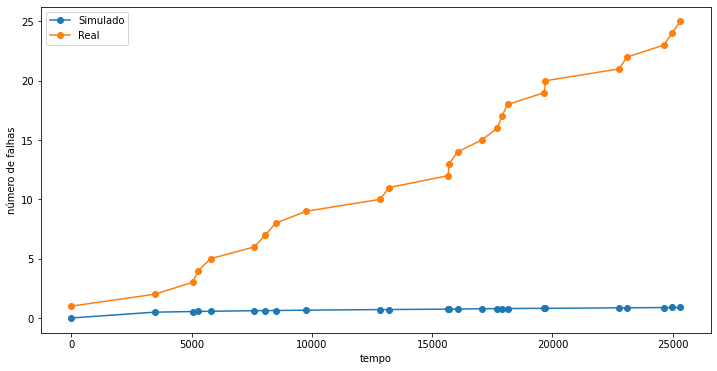

In [ ]:
graf_mae(dados1, mean_nf_ac)

In [ ]:
dados = np.cumsum(dados1)
dados = np.insert(dados, 0, 0)
n = len(dados)
dados_1 = [0]*n
dados_1[0]= 1
for i in range(1, n):
  dados_1[i] = dados_1[i] + 1
dados_1 = np.cumsum(dados_1)

In [ ]:
mae = sklearn.metrics.mean_absolute_error(dados_1, mean_nf_ac)

In [ ]:
mae

12.247840000000002

Questão 10

In [ ]:
#modelo para estimação de parâmetros da PR
def ln_ltt_PR(parametros):
  n = len(dados2)

  soma1 = 0
  for i in range(1, n):
    soma1 += mt.log(dados2[i])

  soma2 = 0
  for i in range(1, n):
    soma2 += (dados2[i]/parametros[0])**parametros[1]

  x_est = abs(dados2[-1] - dados2[-2])
  ln_verossimilhança_ltt_PR = (parametros[1] - 1)*(mt.log(dados2[0]) + soma1)+ 
  n*(mt.log(parametros[1])-mt.log(parametros[0])) - ((x_est/parametros[0])**parametros[1]) 
  - ((dados2[0]/parametros[0])**parametros[1]) - soma2

  return -ln_verossimilhança_ltt_PR

In [ ]:
lb =[1e-2, 1e-2]
ub = [1000, 5]
par, optimizer2 = pso(ln_ltt_PR, lb, ub,maxiter=1000,swarmsize=25, phip=0.45, phig=0.65)
print(par)
print(optimizer2)

Stopping search: Swarm best objective change less than 1e-08
[163.06155317   5.        ]
-684.1431068073202


In [ ]:
def simulacao(dados, mc, alfa, beta):
  #entrada
  t = np.cumsum(dados)
  t = np.insert(t, 0, 0) #v[0] = 0
  n = len(t)
  nf = [0]*n
  mean_nf = [0]*n


#caso para primeira falha
  for j in range(0, mc):
    tac = t[0]
    flag = True
    while (tac < t[1]) and (flag == True):
      u = random()
      x = alfa*(-mt.log(1 - u))**(1/beta)
      if (tac + x <= t[1]):
        tac += x
        nf[1] = nf[1] + 1
      else:
        flag = False
    mean_nf[1] = nf[1]/mc
    
#caso da n-ésima falha
  for i in range(2, n):
    for j in range(0, mc):
      tac = t[i-1]
      flag = True
      while (tac < t[i]) and (flag == True):
        u = random()
        x = alfa*(- mt.log(1 - u))**(1/beta)
        print(x)
        #print('x, i!=0', x)
        if (tac + x <= t[i]):
          tac += x
          nf[i] = nf[i] + 1
        else:
          flag = False
    mean_nf[i] = nf[i]/mc
  
  mean_nf_ac = np.cumsum(mean_nf)


  return (mean_nf_ac)

In [ ]:
simulacao(dados2, 1000, 270.801, 0.6197)

A saída de streaming foi truncada nas últimas 5000 linhas.
1474.8333751617683
3.1726897171738253
2338.0980872538253
66.76359308581314
83.26778891552655
2172.6589844687423
477.4773164844005
23.6348105543988
242.6978495173186
380.1794201799492
669.4150928174585
3643.3596021913327
71.79137780824087
182.90932913620264
7.132144029351258
143.50267976868838
38.77171228863683
31.63967688151166
896.0599216591039
64.60011984439551
474.93349149000534
11.422066075060199
387.01210106001713
149.8127677224652
622.6038032559348
79.31613262344747
222.56385100184826
82.0075875276566
1454.6811576695575
1150.741272694608
1571.8080588503674
5.731140385253177
73.37569950397955
197.39821928165009
164.77115902083892
190.30490483149552
3.9823841241178752
55.45427512230599
395.90880607811295
69.46350714593224
15.565953506079333
976.9895739575858
171.39505909123076
68.8743394194515
188.11241339004025
580.7942056179843
654.3152845863683
707.9342513247221
340.5808058213224
287.1886662663856
47.81093921664464
318.3

array([ 0.   ,  0.585,  0.881,  1.494,  1.609,  1.907,  2.263,  2.568,
        2.77 ,  3.198,  3.272,  3.414,  3.594,  3.918,  4.021,  4.532,
        5.056,  6.197,  6.429,  6.872,  7.137,  7.197,  7.313,  7.533,
        8.136,  8.286,  8.791,  8.922,  9.329,  9.578,  9.72 , 10.116,
       10.311, 10.48 , 10.895, 11.118, 11.279, 11.666, 11.859, 12.221,
       12.371, 12.76 , 12.938, 13.22 , 13.731, 13.927, 14.272, 15.021,
       15.24 , 15.387, 15.563, 15.629, 16.017, 16.256, 17.026, 17.37 ,
       17.774, 17.901, 18.093, 18.159, 18.492, 18.677, 18.796, 19.31 ,
       19.699, 20.347, 20.435, 20.826, 21.193, 21.438, 22.014, 22.112,
       22.275])

In [ ]:
dados = np.cumsum(dados2)
dados = np.insert(dados, 0, 0)
n = len(dados)
dados_1 = [0]*n
dados_1[0]= 1
for i in range(1, n):
  dados_1[i] = dados_1[i] + 1
dados_1 = np.cumsum(dados_1)

In [ ]:
mae = sklearn.metrics.mean_absolute_error(dados_1, mean_nf_ac)

In [ ]:
mean_nf_ac = [ 0.   ,  0.023,  0.04 ,  0.135,  0.143,  0.185,  0.246,  0.296,
        0.32 ,  0.389,  0.395,  0.412,  0.433,  0.511,  0.522,  0.675,
        0.858,  1.575,  1.652,  1.915,  1.999,  2.006,  2.038,  2.134,
        2.491,  2.541,  2.942,  2.985,  3.211,  3.296,  3.353,  3.593,
        3.719,  3.767,  4.025,  4.131,  4.205,  4.474,  4.583,  4.83 ,
        4.913,  5.185,  5.262,  5.491,  5.913,  6.016,  6.22 ,  7.059,
        7.182,  7.244,  7.361,  7.39 ,  7.715,  7.881,  8.8  ,  9.117,
        9.527,  9.606,  9.746,  9.765, 10.11 , 10.224, 10.285, 10.861,
       11.326, 12.12 , 12.164, 12.606, 12.991, 13.193, 13.889, 13.951,
       14.062]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

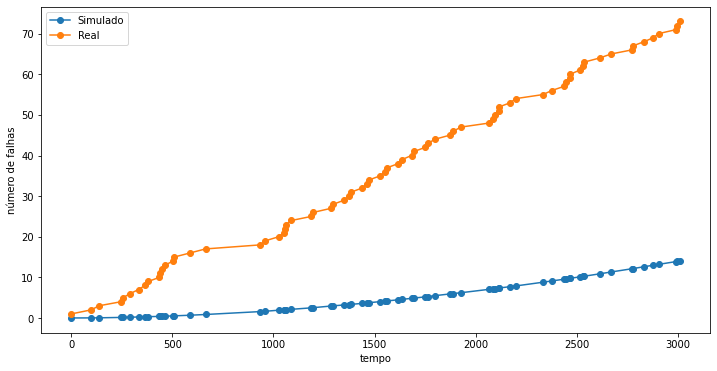

In [ ]:
graf_mae(dados2, mean_nf_ac)

In [ ]:
mae

31.764068493150685

In [ ]:
#Gráfico

def graf_mae(dados, mean_nf_ac):
  #Gráfico
  dados = np.cumsum(dados)
  dados = np.insert(dados, 0, 0)
  n = len(dados)
  dados_1 = [0]*n
  dados_1[0]= 1
  for i in range(1, n):
    dados_1[i] = dados_1[i] + 1
  dados_1 = np.cumsum(dados_1)

  plt.figure(figsize=(12, 6))
  plt.plot(dados, mean_nf_ac, marker='o', label= "Simulado")
  plt.plot(dados, dados_1, marker='o', label = "Real")
  plt.xlabel('tempo')
  plt.ylabel('número de falhas')
  plt.legend()
 
  return dados_1

In [ ]:
#modelo para estimação de parâmetros da NHPP
def ln_ltt_NHPP(parametros):
  n = len(dados2)

  soma1 = 0
  for i in range(1, n): 
    soma_int = 0
    for j in range(0, i): 
      soma_int += dados2[j]
    soma1 += mt.log(dados2[i] + soma_int)

  soma2 = 0
  for k in range(0, n):
    soma2 += dados2[k]

  soma3 = 0
  for z in range(1, n):
    soma_int = 0
    for t in range(0, i):
      soma_int += dados2[t]
    soma3 += (((soma_int/parametros[0])**parametros[1]) - (((dados2[z] + soma_int)/parametros[0])**parametros[1]))

  x_est = abs(dados2[-1] - dados2[-2])

  ln_verossimilhança_ltt = (parametros[1] - 1)*(mt.log(dados2[0]) + soma1) + n*(mt.log(parametros[1]) 
  - parametros[1]*mt.log(parametros[0])) - (((x_est + parametros[2]*soma2)/parametros[0])**parametros[1]) 
  + (((parametros[2]*soma2)**parametros[1] - dados2[0]**parametros[1])/parametros[0]**parametros[1]) + soma3

  return -ln_verossimilhança_ltt

In [ ]:
lb =[1e-2, 1e-4]
ub = [1000, 50]
par, optimizer2 = pso(ln_ltt_NHPP, lb, ub,maxiter=10000,swarmsize=72, phip=0.35, phig=0.75)
print(par)
print(optimizer2)

In [ ]:
def simulacao(dados, mc, alfa, beta):
  #entrada
  t = np.cumsum(dados)
  t = np.insert(t, 0, 0) #v[0] = 0
  n = len(t)
  nf = [0]*n
  mean_nf = [0]*n


#caso para primeira falha
  for j in range(0, mc):
    tac = t[0]
    flag = True
    while (tac < t[1]) and (flag == True):
      u = random()
      x = alfa*(-mt.log(1 - u))**(1/beta)
      if (tac + x <= t[1]):
        tac += x
        nf[1] = nf[1] + 1
      else:
        flag = False
    mean_nf[1] = nf[1]/mc
    
#caso da n-ésima falha
  for i in range(2, n):
    for j in range(0, mc):
      tac = t[i-1]
      flag = True
      while (tac < t[i]) and (flag == True):
        u = random()
        x = (alfa*((((t[i-1])/alfa)**beta) - mt.log(1 - u))**(1/beta)) - t[i-1]
        print(x)
        #print('x, i!=0', x)
        if (tac + x <= t[i]):
          tac += x
          nf[i] = nf[i] + 1
        else:
          flag = False
    mean_nf[i] = nf[i]/mc
  
  mean_nf_ac = np.cumsum(mean_nf)


  return (mean_nf_ac)

In [ ]:
simulacao(dados2, 1000, 710.833, 1.8344)

A saída de streaming foi truncada nas últimas 5000 linhas.
66.71633862187628
501.69922818679515
428.97083127838096
65.99497759779024
248.23060025000768
192.67428250530793
85.19988071295302
515.5169692630648
213.54973305377553
33.78988266820852
13.725730270346958
91.80647332318404
9.576116120712868
211.37712309129938
75.24496494735604
56.164918875378135
40.44006111650742
151.4391313638739
343.3630116826048
58.353988994788324
211.85028456687724
80.90542130773247
43.56594543480969
146.44869526639513
387.26083749469217
96.86901495031725
288.9258739139718
24.59526879992245
319.2077913307312
156.18897215273864
129.71872041600727
549.6226203807087
39.22504150156965
5.665117648177784
80.35969681451206
153.47419891622758
365.4830850372491
241.6693088687498
111.35768622722526
21.495973440532453
146.3586681689535
14.97921871792505
158.77728532854871
148.44414534178622
44.62901053686619
38.23477285803847
353.049193249356
27.97693098862237
7.0617929281738725
143.97757024780094
49.1930829303883
79.5

array([ 0.   ,  0.023,  0.04 ,  0.135,  0.143,  0.185,  0.246,  0.296,
        0.32 ,  0.389,  0.395,  0.412,  0.433,  0.511,  0.522,  0.675,
        0.858,  1.575,  1.652,  1.915,  1.999,  2.006,  2.038,  2.134,
        2.491,  2.541,  2.942,  2.985,  3.211,  3.296,  3.353,  3.593,
        3.719,  3.767,  4.025,  4.131,  4.205,  4.474,  4.583,  4.83 ,
        4.913,  5.185,  5.262,  5.491,  5.913,  6.016,  6.22 ,  7.059,
        7.182,  7.244,  7.361,  7.39 ,  7.715,  7.881,  8.8  ,  9.117,
        9.527,  9.606,  9.746,  9.765, 10.11 , 10.224, 10.285, 10.861,
       11.326, 12.12 , 12.164, 12.606, 12.991, 13.193, 13.889, 13.951,
       14.062])